### 1. Loading the Dataset

In [1]:
### Your solution here
import pandas as pd
import numpy as np

df = pd.read_csv('../data/processed/insurance.csv')
#print(df) 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Exploring the Dataset

#### 2.1 Exploring the *Shape* of the Dataset

In [2]:
print(df.shape)

(1338, 7)


#### 2.2 Exploring the *info* of the Dataset

In [3]:
print(df.info)

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


#### 2.3 Having a look at statistical summary of the *numerical* data.

In [4]:
df.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### 2.3 Having a look at statistical summary of the *categorical* data.

In [5]:
df.describe(exclude=np.number).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


#### 2.3 Having a look at statistical summary of the Dataset with *pandas_profiling*.

In [6]:
import pandas_profiling as pdp

profile = pdp.ProfileReport(df)
profile
#profile.to_file(output_file='Dataset_Profile.html') #saving the profile into the Dataset_Profile.html

#### 2.4 Exploring if there is any *Null* value in the Dataset

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3. My observations after the initial exploration of the Dataset:

- 
- 
- 

### 4. Data Wrangling

#### 4.1 Renaming the columns to the standard naming format.

In [10]:
df = df.rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'})
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df = df.dropna()

#### 4.2 Resetting the index.

In [12]:
df = df.reset_index()
df.head()

,index,Age,Sex,BMI,Children,Smoker,Region,Charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


#### 4.3 Deleting the newly added *index* column.

In [13]:
df = df.drop(['index'], axis=1)
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df = df.drop_duplicates()

#### 4.4 Sorting the Dataset based on the *Age*.

In [15]:
df.sort_values(by = ['Age'])
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 4.5 Adding a new column ***Risk*** based on BMI values.

In [21]:
conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25.0) & (df['BMI'] < 30),
    (df['BMI'] >= 30)
    ]

values = ['Under Weight', 'Healthy Weight', 'Over Weight', 'Obese']

df['Risk'] = np.select(conditions, values)
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Risk
0,19,female,27.900,0,yes,southwest,16884.92400,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Over Weight


In [22]:
df.Risk.unique() 

array(['Over Weight', 'Obese', 'Healthy Weight', 'Under Weight'],
      dtype=object)

## Method Chaining

In [ ]:
df = (
    .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'})
    .dropna()
    .reset_index()
    .drop(['index'], axis=1)
    .drop_duplicates()
    .sort_values(by = ['Age'])
)

### 5. Data Visualization

### Setting the Visualization Environment.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your solution here

sns.set_theme(style="ticks",
              font_scale=1.3, 
             )
plt.rc("axes.spines", top=False, right=False)

#### 5.1 Finding if there is any relation between Smoking habit, BMI and Charges.

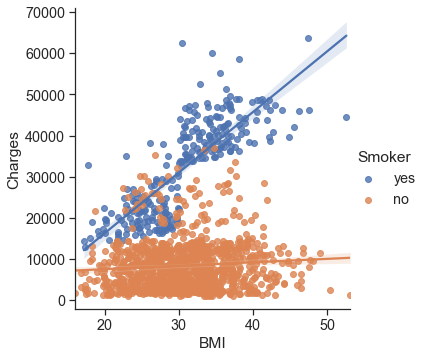

In [51]:
sns.lmplot(x="BMI", y="Charges", hue="Smoker", data=df)

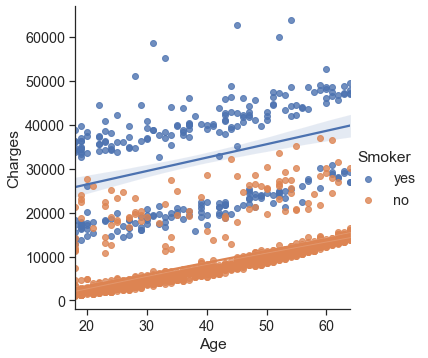

In [101]:
sns.lmplot(x="Age", y="Charges", hue="Smoker", data=df)

#### 5.2 The Distribution of charges for smokers vs. non-smoker.

Text(13.448338770833331, 0.5, "Patients' Smoking Habits")

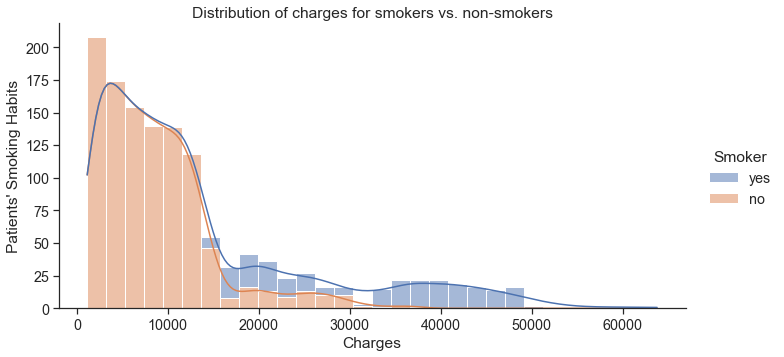

In [76]:
sns.displot(data = df, x = "Charges", hue="Smoker",aspect=2, multiple="stack", kde = True)
plt.title("Distribution of charges for smokers vs. non-smokers")
plt.xlabel("Charges")
plt.ylabel("Patients' Smoking Habits")

#### 5.3 Finding if the number of Children has any impact on Charges.

<AxesSubplot:title={'center':'Relation between Age and Charges'}, xlabel='Children', ylabel='Charges'>

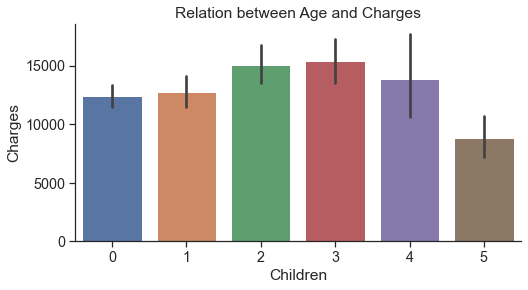

In [62]:
plt.figure(figsize=(8,4))
plt.title('Relation between Age and Charges')
sns.barplot(x=df['Children'], y=df['Charges'])

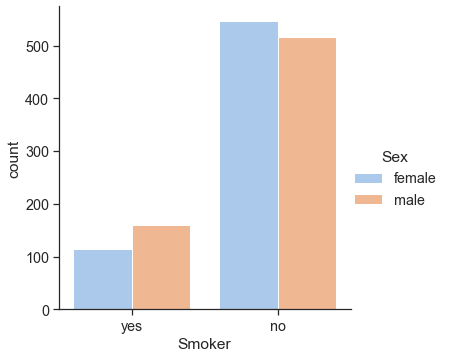

In [79]:
sns.catplot(x="Smoker", kind="count",hue = 'Sex', palette="pastel", data=df)

#### 5.4 Region-wise Charging 

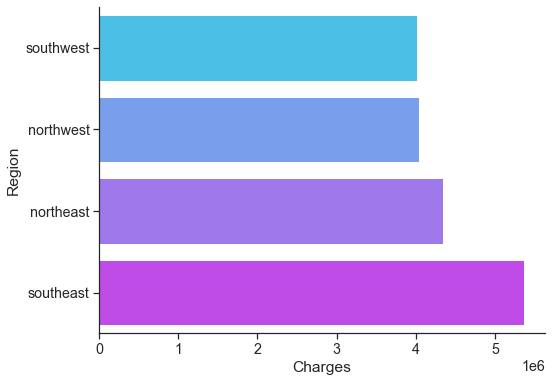

In [92]:
charges = df['Charges'].groupby(df.Region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x = charges.head(), y =charges.head().index, palette='cool')

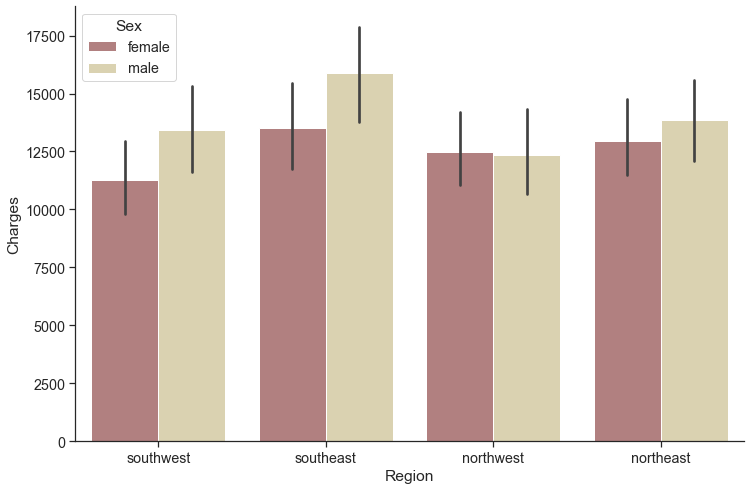

In [97]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region', y='Charges', hue='Sex', data=df, palette='pink')

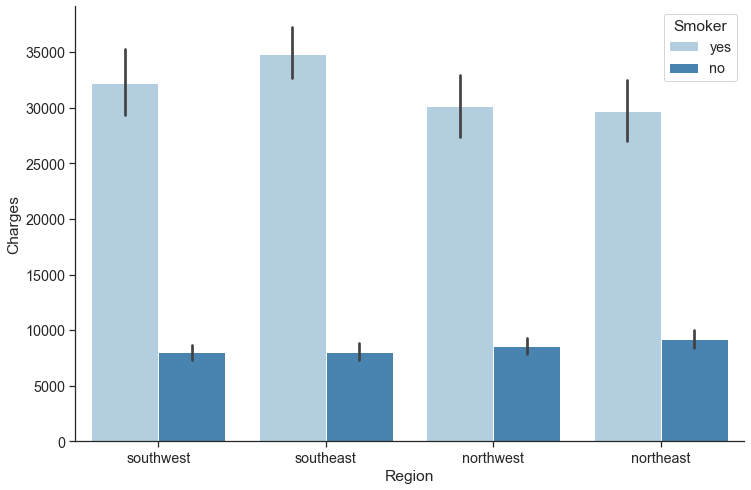

In [122]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'Region', y = 'Charges', hue='Smoker', data=df, palette='Blues')

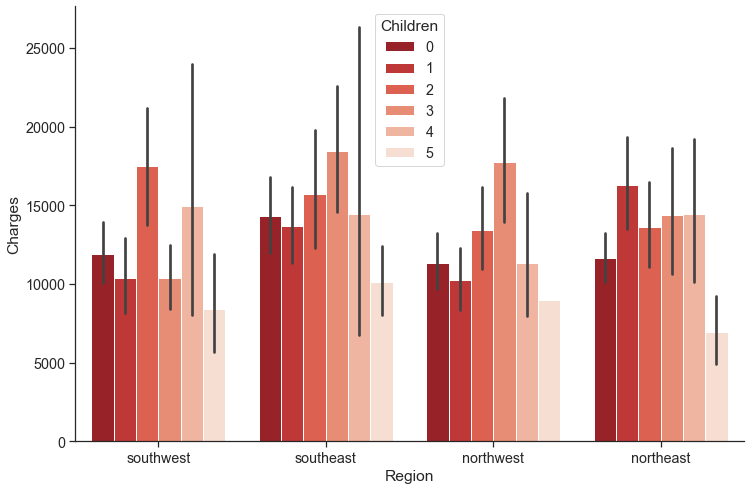

In [106]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region', y='Charges', hue='Children', data=df, palette='Reds_r')

<AxesSubplot:xlabel='count', ylabel='Region'>

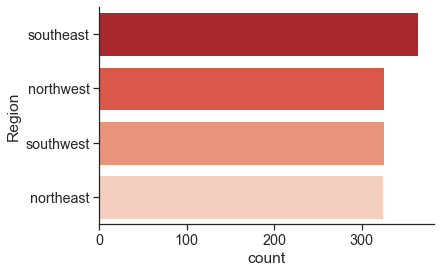

In [129]:
sns.countplot(data=df, y ="Region", palette = 'Reds_r', order = df["Region"].value_counts().index)

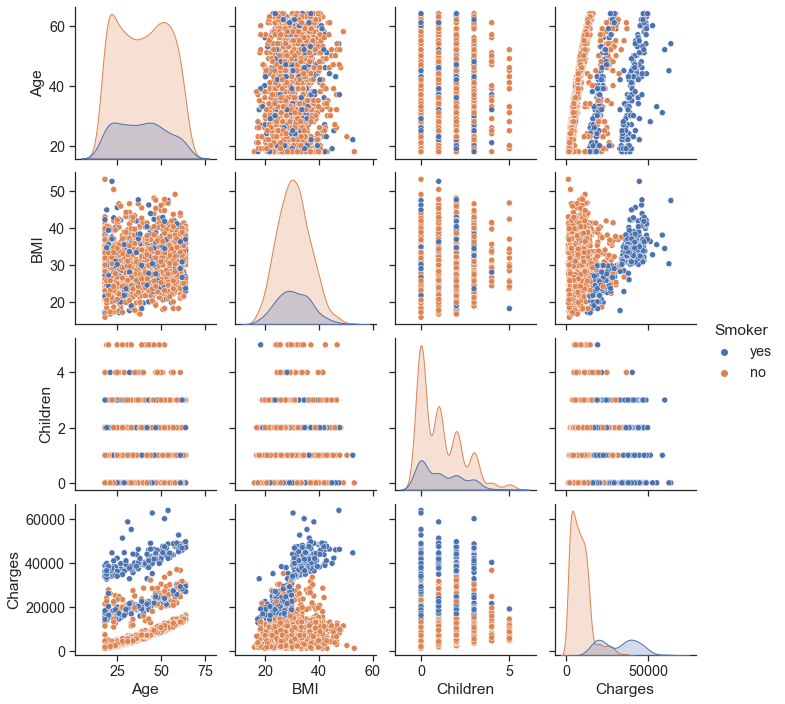

In [134]:
sns.pairplot(df, hue ='Smoker')

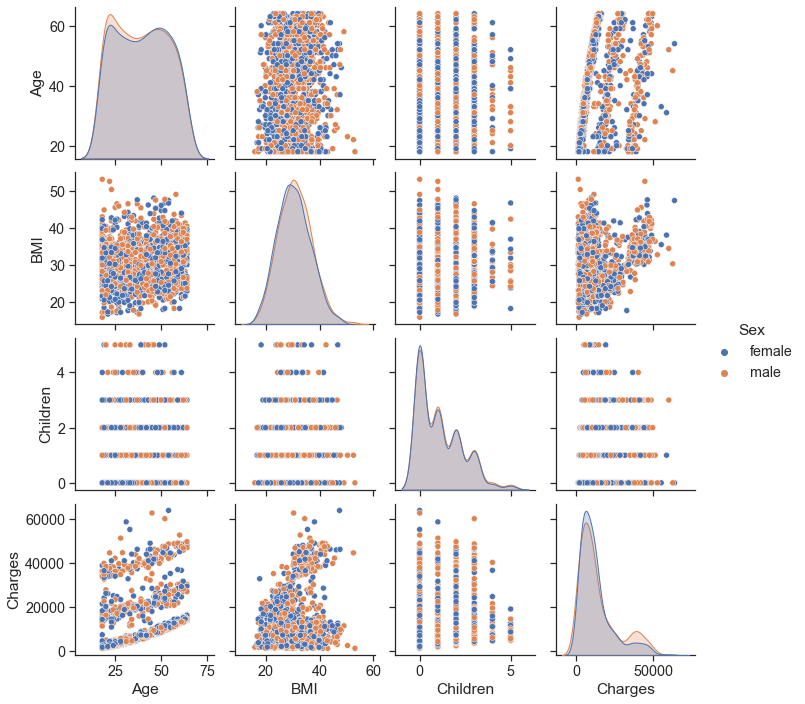

In [135]:
sns.pairplot(df, hue ='Sex')

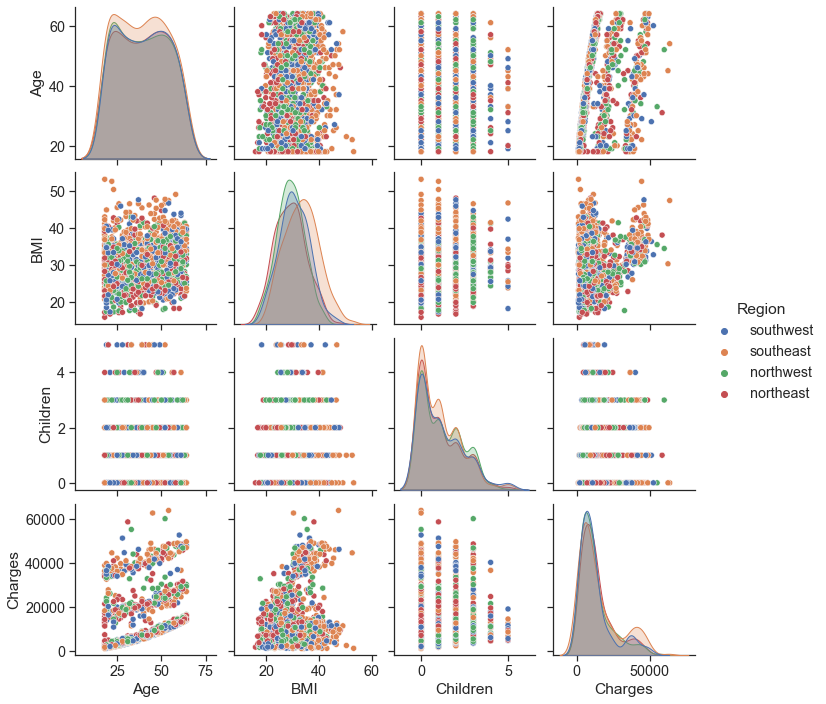

In [136]:
sns.pairplot(df, hue ='Region')

In [150]:
df.head()


,Age,Sex,BMI,Children,Smoker,Region,Charges,Risk
0,19,female,27.900,0,yes,southwest,16884.92400,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Over Weight


<AxesSubplot:xlabel='count', ylabel='Sex'>

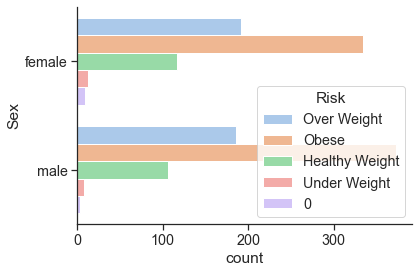

In [152]:
sns.countplot(data=df, y ="Sex", palette = 'pastel', hue = 'Risk')


<AxesSubplot:xlabel='count', ylabel='Smoker'>

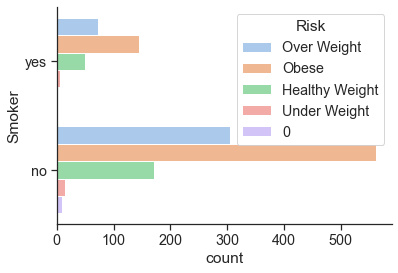

In [153]:
sns.countplot(data=df, y ="Smoker", palette = 'pastel', hue = 'Risk')

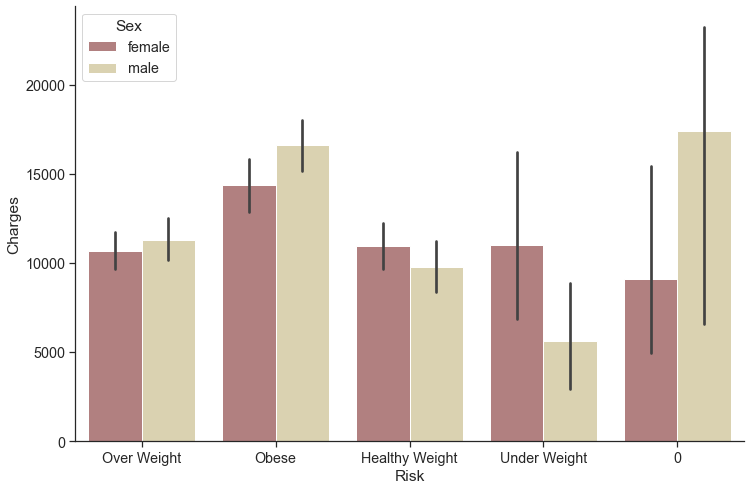

In [155]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Risk', y='Charges', hue='Sex', data=df, palette='pink')

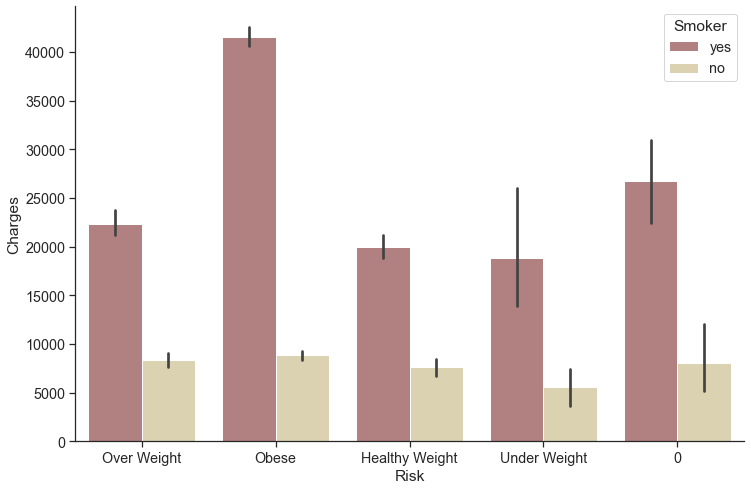

In [156]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Risk', y='Charges', hue='Smoker', data=df, palette='pink')

In [54]:
print('Obese: ',np.sum(df.Risk == 'Obese'))
print('Over Weight: ',np.sum(df.Risk == 'Over Weight'))
print('Healthy Weight: ',np.sum(df.Risk == 'Healthy Weight'))
print('Under Weight',np.sum(df.Risk == 'Under Weight'))

Obese:  706
Over Weight:  386
Healthy Weight:  225
Under Weight 20


<AxesSubplot:xlabel='count', ylabel='Risk'>

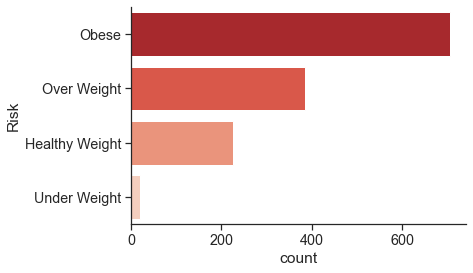

In [55]:
sns.countplot(data=df, y ="Risk", palette = 'Reds_r', order = df["Risk"].value_counts().index)

In [47]:
print('Total Female with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Sex'] == 'female')]))
print('Total Male with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Sex'] == 'male')]))

Total Female with Obese:  334
Total Male with Obese:  372


<AxesSubplot:xlabel='count', ylabel='Risk'>

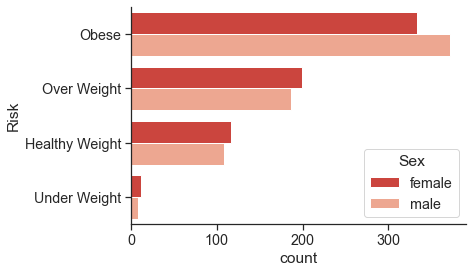

In [57]:
sns.countplot(data=df, y ="Risk", hue = 'Sex', palette = 'Reds_r', order = df["Risk"].value_counts().index)

In [58]:
print('Total Smoker with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Smoker'] == 'no')]))

Total Smoker with Obese:  145
Total Non-Smoker with Obese:  561


<AxesSubplot:xlabel='count', ylabel='Risk'>

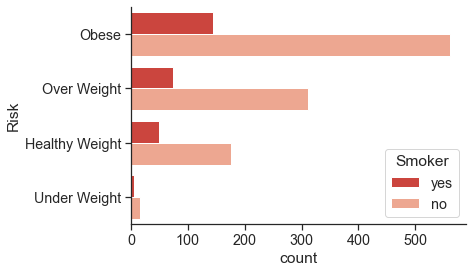

In [59]:
sns.countplot(data=df, y ="Risk", hue = 'Smoker', palette = 'Reds_r', order = df["Risk"].value_counts().index)